<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/Precision_6_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = demographic event

df2 = demograhic static

df3 = ed visits

df4 = medications ordered

df5 = medications administered

df6 = death train

## **DEMOGRAPHIC EVENT**

In [46]:
df1 = pd.read_csv('/content/demographics_event_qual.csv')
df2 = pd.read_csv('/content/demographics_static_qual.csv')
df3 = pd.read_csv('/content/ed_visits_qual.csv')
df4 = pd.read_csv('/content/medications_ordered_qual.csv')
df5 = pd.read_csv('/content/medications_administered_qual.csv')
df6 = pd.read_csv('/content/death_train.csv')

In [47]:
df1.head()

,Unnamed: 0,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,111,101984,64.882403,2020-07-30 12:26:07.0,Married,Urban
1,156,102905,79.456365,2022-05-06 07:13:46.0,Married,Urban
2,177,103133,100.560119,2017-08-28 17:22:05.0,Married,Urban
3,195,10351,92.317781,2018-04-11 03:34:37.0,Married,Rural
4,312,105402,85.572665,2021-08-09 19:25:16.0,Separated,Urban


In [48]:

df1.drop('Unnamed: 0',axis = 1,inplace = True)
df2.drop('Unnamed: 0',axis = 1,inplace = True)
df3.drop('Unnamed: 0',axis = 1,inplace = True)
df4.drop('Unnamed: 0',axis = 1,inplace = True)
df5.drop('Unnamed: 0',axis = 1,inplace = True)

In [49]:
df1.head()

,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,101984,64.882403,2020-07-30 12:26:07.0,Married,Urban
1,102905,79.456365,2022-05-06 07:13:46.0,Married,Urban
2,103133,100.560119,2017-08-28 17:22:05.0,Married,Urban
3,10351,92.317781,2018-04-11 03:34:37.0,Married,Rural
4,105402,85.572665,2021-08-09 19:25:16.0,Separated,Urban


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Internalpatientid  1000 non-null   int64  
 1   Age at update      1000 non-null   float64
 2   Event date         1000 non-null   object 
 3   Marital status     1000 non-null   object 
 4   Ruca category      1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [51]:
df1.isnull().sum()

Internalpatientid    0
Age at update        0
Event date           0
Marital status       0
Ruca category        0
dtype: int64

In [52]:

# split the DateTime column into separate Date and Time columns
df1[['Date', 'Time']] = df1['Event date'].str.split(' ', expand=True)
     

In [53]:

df1.drop('Event date',axis = 1,inplace = True)
df1.head()

,Internalpatientid,Age at update,Marital status,Ruca category,Date,Time
0,101984,64.882403,Married,Urban,2020-07-30,12:26:07.0
1,102905,79.456365,Married,Urban,2022-05-06,07:13:46.0
2,103133,100.560119,Married,Urban,2017-08-28,17:22:05.0
3,10351,92.317781,Married,Rural,2018-04-11,03:34:37.0
4,105402,85.572665,Separated,Urban,2021-08-09,19:25:16.0


In [54]:
df1.shape

(1000, 6)

In [55]:
df1.rename(columns={'Marital status': 'Marital_status', 'Age at update':'Age_at_update','Ruca category':'Ruca_category'},inplace = True)
df1.head()
     

,Internalpatientid,Age_at_update,Marital_status,Ruca_category,Date,Time
0,101984,64.882403,Married,Urban,2020-07-30,12:26:07.0
1,102905,79.456365,Married,Urban,2022-05-06,07:13:46.0
2,103133,100.560119,Married,Urban,2017-08-28,17:22:05.0
3,10351,92.317781,Married,Rural,2018-04-11,03:34:37.0
4,105402,85.572665,Separated,Urban,2021-08-09,19:25:16.0


In [56]:

df1.Marital_status.unique()

array(['Married', 'Separated', 'Unknown', 'Widowed', 'Never married',
       'Divorced', 'Single', 'Not specified (no value)'], dtype=object)

In [57]:
df1.Marital_status.value_counts()

Married                     569
Divorced                    184
Widowed                     132
Never married                86
Separated                    21
Unknown                       5
Not specified (no value)      2
Single                        1
Name: Marital_status, dtype: int64

In [58]:

df1.Ruca_category.value_counts()

Urban            650
Rural            330
Highly rural      14
Not specified      6
Name: Ruca_category, dtype: int64

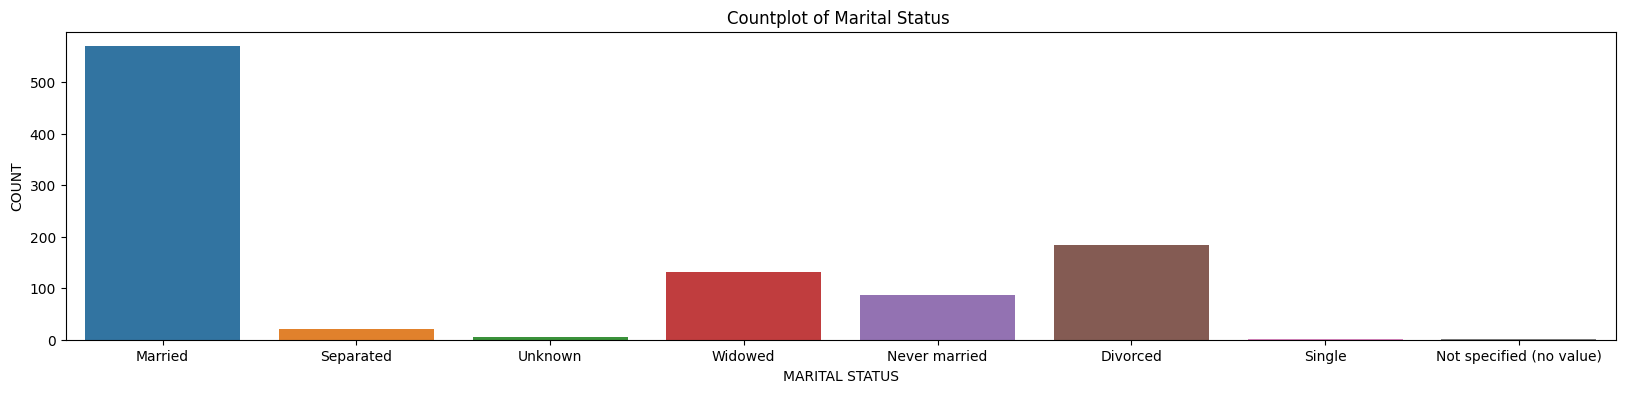

In [59]:
# Create the countplot
plt.figure(figsize=(20,4))
sns.countplot(x="Marital_status", data=df1)

# Add labels and title
plt.xlabel("MARITAL STATUS")
plt.ylabel("COUNT")
plt.title("Countplot of Marital Status ")
# Adjust the width between variables


# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


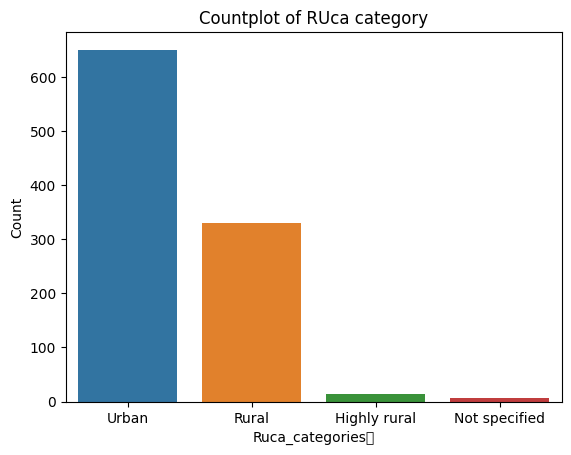

In [60]:
# Create the countplot
sns.countplot(x="Ruca_category", data=df1)

# Add labels and title
plt.xlabel("Ruca_categories	")
plt.ylabel("Count")
plt.title("Countplot of RUca category")

# Show the plot
plt.show()

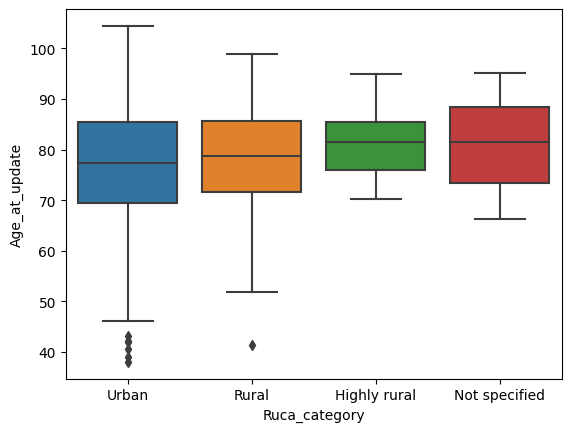

In [61]:
sns.boxplot(x='Ruca_category', y='Age_at_update', data=df1)
plt.show()
     

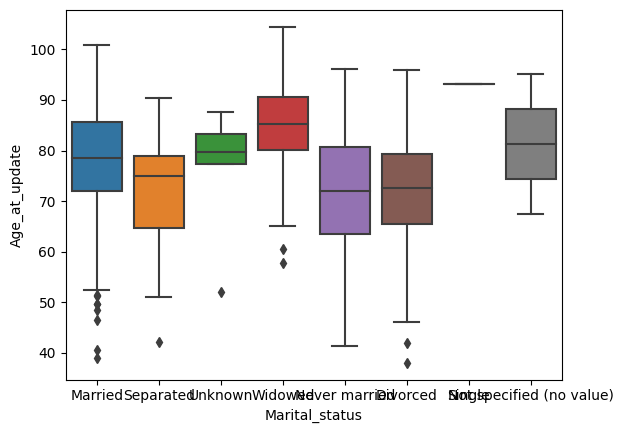

In [62]:
sns.boxplot(x='Marital_status', y='Age_at_update', data=df1)
plt.show()

<Axes: xlabel='Age_at_update', ylabel='Density'>

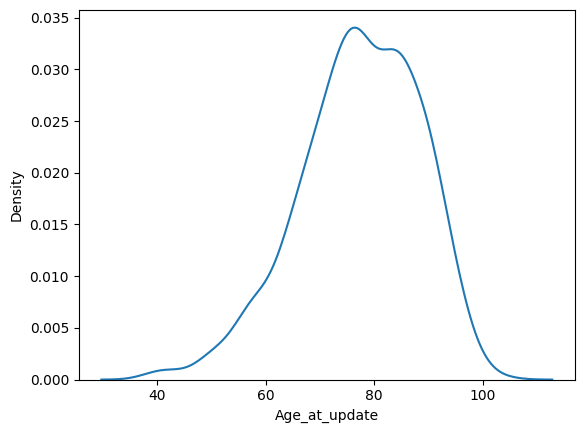

In [63]:
# Create a density plot
sns.kdeplot(data=df1, x="Age_at_update")

## **DEMOGRAPHIC STATIC**

In [64]:
df2.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168899,Not specified,Male,Other,Yes
1,22214,Not Hispanic or Latino,Male,White,Yes
2,24552,Not Hispanic or Latino,Male,Black or African American,Yes
3,27878,Not specified,Male,Not specified (no value),Yes
4,29798,Not Hispanic or Latino,Male,White,Yes


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Internalpatientid  1000 non-null   int64 
 1   Ethnicity          1000 non-null   object
 2   Gender             1000 non-null   object
 3   Races              1000 non-null   object
 4   Veteran flag       1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [66]:
df2.shape

(1000, 5)

In [67]:
# rename two of the columns by using the 'rename' method
df2.rename(columns={'Veteran flag':'Veteran_flag'}, inplace=True)
df2.columns

Index(['Internalpatientid', 'Ethnicity', 'Gender', 'Races', 'Veteran_flag'], dtype='object')

In [68]:

df2.Veteran_flag.value_counts()

Yes    998
No       2
Name: Veteran_flag, dtype: int64

In [69]:

df2.Races.value_counts()
     

White                                645
Not specified (no value)             168
Black or African American            117
Other                                 55
White ; Other                          7
Asian                                  5
Black or African American ; White      2
Black or African American ; Other      1
Name: Races, dtype: int64

In [70]:
df2.Gender.value_counts()

Male      976
Female     24
Name: Gender, dtype: int64

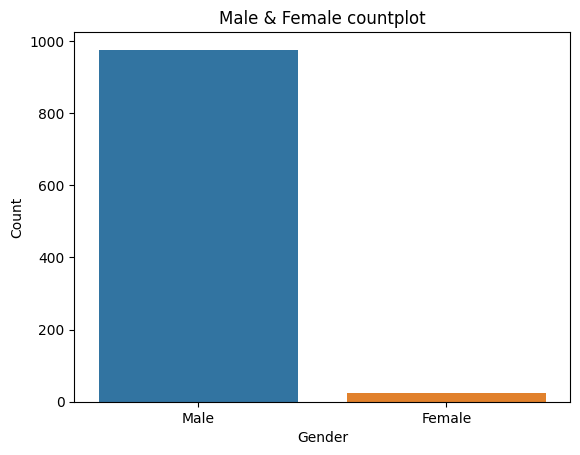

In [71]:
# Create the countplot
sns.countplot(x="Gender", data=df2)

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male & Female countplot")

# Show the plot
plt.show()
     

In [72]:
df2.Races.unique()
     

array(['Other', 'White', 'Black or African American',
       'Not specified (no value)', 'Asian', 'White ; Other',
       'Black or African American ; White',
       'Black or African American ; Other'], dtype=object)

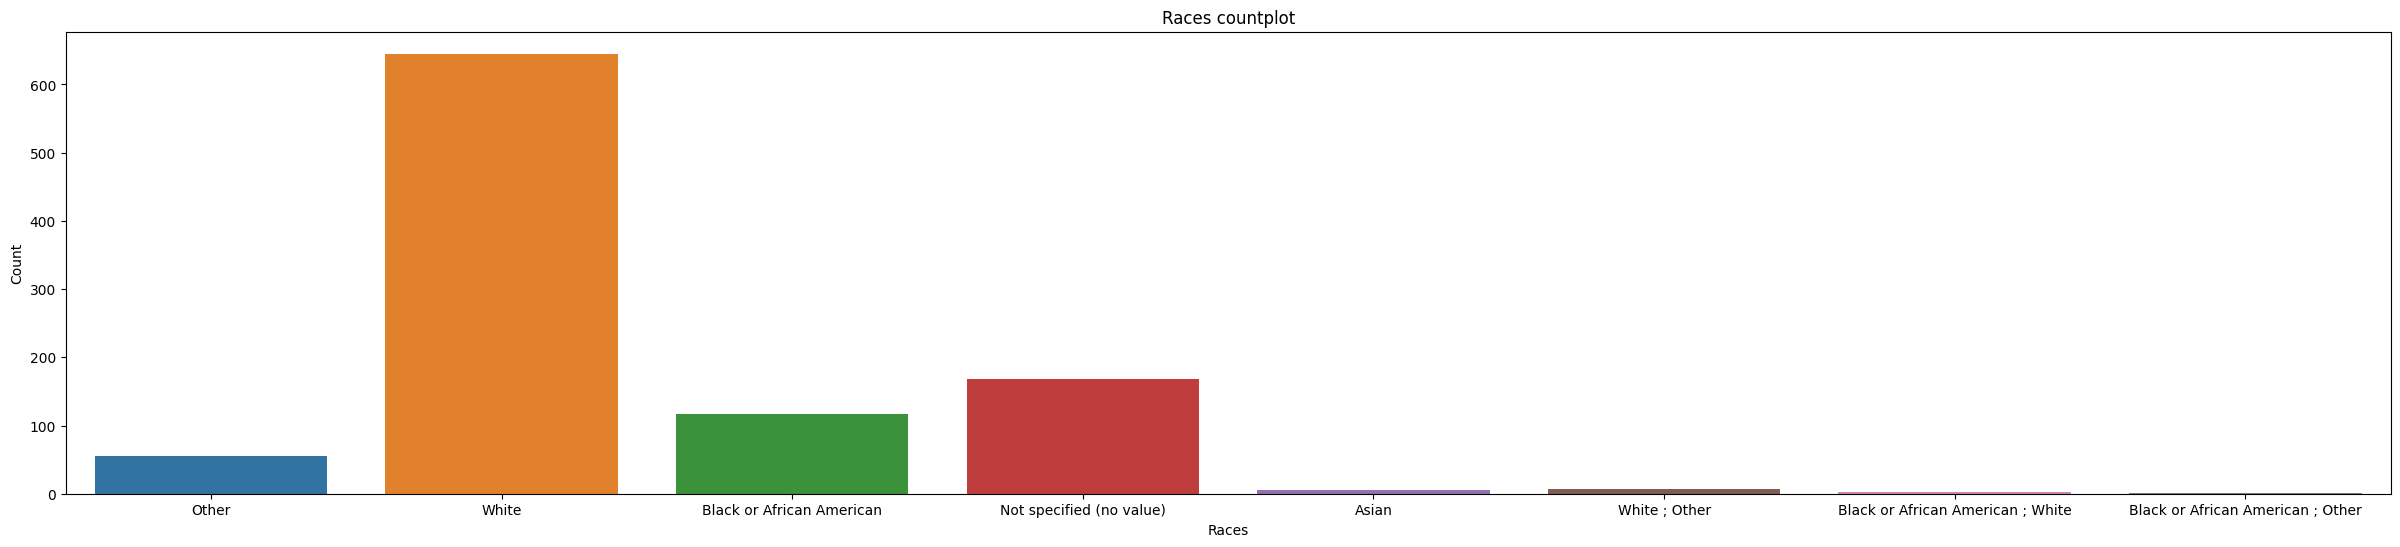

In [137]:
# Create the countplot
plt.figure(figsize=(30,6))
sns.countplot(x="Races", data=df2)

# Add labels and title
plt.xlabel("Races")
plt.ylabel("Count")
plt.title("Races countplot")

# Show the plot
plt.show()

In [73]:

df2.Races.nunique()

8

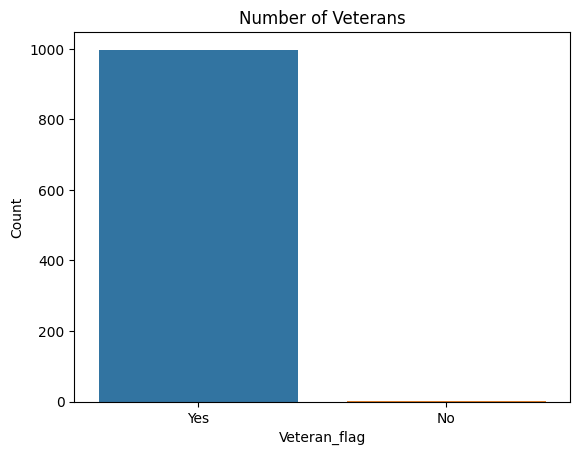

In [74]:
# Create the countplot
sns.countplot(x="Veteran_flag", data=df2)

# Add labels and title
plt.xlabel("Veteran_flag")
plt.ylabel("Count")
plt.title("Number of Veterans")

# Show the plot
plt.show()
     

In [75]:
df2.Ethnicity.nunique()

3

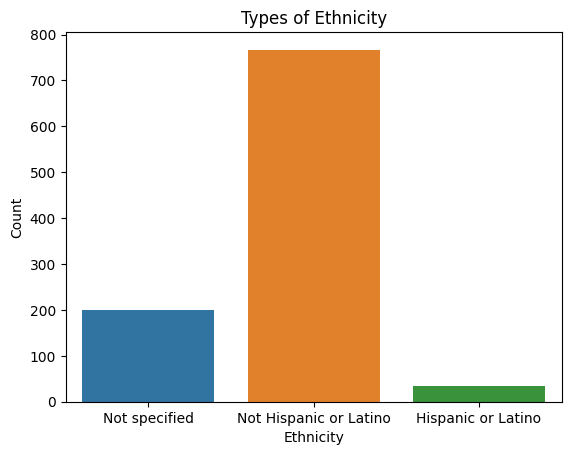

In [76]:
# Create the countplot
sns.countplot(x="Ethnicity", data=df2)

# Add labels and title
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Types of Ethnicity")

# Show the plot
plt.show()

## **ED VISITS**

In [77]:
df3.head()

,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,106440,64.954978,04:13.0,50:26.0,NaN,Pressure ulcer of heel,"Chronic kidney disease, unspecified",Texas
1,129977,82.745838,29:29.0,16:32.0,NaN,"Sepsis, unspecified organism","Urinary tract infection, site not specified",Oklahoma
2,106440,63.700552,14:25.0,19:09.0,NaN,Cellulitis and acute lymphangitis of other par...,"Hematuria, unspecified",Texas
3,131548,81.817275,08:00.0,07:39.0,NaN,Abdominal distension (gaseous),Unspecified abdominal pain,Illinois
4,129977,84.977907,11:58.0,08:41.0,NaN,Constipation,"Urinary tract infection, site not specified",Oklahoma


In [78]:
# rename two of the columns by using the 'rename' method
df3.rename(columns={'Age at ed visit':'Age_at_ed_visit','Ed visit start date':'Ed_visit_start_date',
                    'Discharge date ed':'Discharge_date_ed','Died during ed visit':'Died_during_ed_visit',
                    'First listed diagnosis icd10 subcategory':'First_listed_diagnosis_icd10_subcategory',
                    'Second listed diagnosis icd10 subcategory':'Second_listed_diagnosis_icd10_subcategory'}, inplace=True)

In [79]:

df3.isnull().sum()

Internalpatientid                               0
Age_at_ed_visit                                 0
Ed_visit_start_date                             0
Discharge_date_ed                               1
Died_during_ed_visit                         4431
First_listed_diagnosis_icd10_subcategory        0
Second_listed_diagnosis_icd10_subcategory       0
State                                           0
dtype: int64

In [80]:
df3.head()

,Internalpatientid,Age_at_ed_visit,Ed_visit_start_date,Discharge_date_ed,Died_during_ed_visit,First_listed_diagnosis_icd10_subcategory,Second_listed_diagnosis_icd10_subcategory,State
0,106440,64.954978,04:13.0,50:26.0,NaN,Pressure ulcer of heel,"Chronic kidney disease, unspecified",Texas
1,129977,82.745838,29:29.0,16:32.0,NaN,"Sepsis, unspecified organism","Urinary tract infection, site not specified",Oklahoma
2,106440,63.700552,14:25.0,19:09.0,NaN,Cellulitis and acute lymphangitis of other par...,"Hematuria, unspecified",Texas
3,131548,81.817275,08:00.0,07:39.0,NaN,Abdominal distension (gaseous),Unspecified abdominal pain,Illinois
4,129977,84.977907,11:58.0,08:41.0,NaN,Constipation,"Urinary tract infection, site not specified",Oklahoma


In [81]:
df3.shape

(4431, 8)

All the data in Died during visit is missing in quality check data.

In [133]:
#df3.First_listed_diagnosis_icd10_subcategory.unique()

In [82]:

df3.First_listed_diagnosis_icd10_subcategory.nunique()

601

In [83]:

df3.Second_listed_diagnosis_icd10_subcategory.nunique()

409

In [84]:
df3.First_listed_diagnosis_icd10_subcategory.value_counts()

Not specified                                                      2155
Chest pain, unspecified                                              79
Pain in joint                                                        76
Dyspnea                                                              63
Systolic (congestive) heart failure                                  62
                                                                   ... 
Injury of conjunctiva and corneal abrasion without foreign body       1
Intestinal adhesions [bands] with obstruction (postinfection)         1
Fracture of upper end of humerus                                      1
Viral pneumonia, unspecified                                          1
Wheezing                                                              1
Name: First_listed_diagnosis_icd10_subcategory, Length: 601, dtype: int64

In [85]:
df3.Second_listed_diagnosis_icd10_subcategory.value_counts()

Not specified                                                                                                        3521
Urinary tract infection, site not specified                                                                            29
Dyspnea                                                                                                                18
Systolic (congestive) heart failure                                                                                    16
Dehydration                                                                                                            15
                                                                                                                     ... 
Driver injured in collision with other and unspecified motor vehicles in traffic accident                               1
Other specified heart block                                                                                             1
Atherosclerosis of coron

In [86]:

df3.State.value_counts()

California              366
New York                300
Florida                 295
Texas                   288
Missouri                244
Wisconsin               222
Ohio                    219
Tennessee               190
Arizona                 153
Michigan                149
North Carolina          136
Pennsylvania            132
Illinois                116
Minnesota               114
Louisiana               113
Georgia                 104
Oklahoma                104
Alabama                  89
Virginia                 85
Kentucky                 72
Arkansas                 66
District of Columbia     63
West Virginia            59
Nebraska                 58
South Carolina           56
New Mexico               49
Washington               48
South Dakota             47
Puerto Rico              45
Idaho                    43
Oregon                   43
Utah                     42
Maryland                 40
Rhode Island             40
Massachusetts            34
Connecticut         

<Axes: xlabel='Age_at_ed_visit', ylabel='Density'>

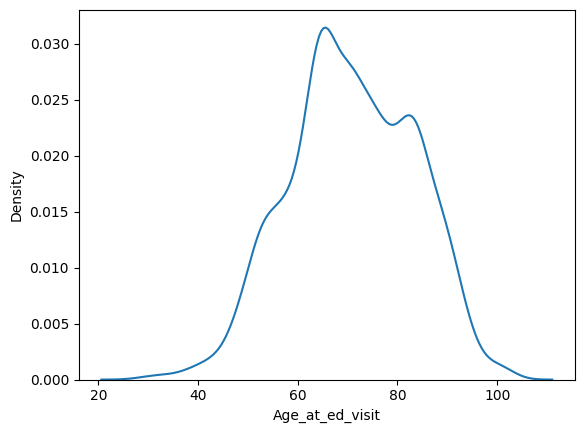

In [87]:
# Create a density plot
sns.kdeplot(data=df3, x="Age_at_ed_visit")

In [138]:
# Extract rows related to heart or heart failure
heart_df = df3[df3['First_listed_diagnosis_icd10_subcategory'].str.contains('heart|heart failure|Systolic (congestive)', case=False)]

<ipython-input-138-eae865d5286a>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  heart_df = df3[df3['First_listed_diagnosis_icd10_subcategory'].str.contains('heart|heart failure|Systolic (congestive)', case=False)]


In [141]:
heart_df.head()

,Internalpatientid,Age_at_ed_visit,Ed_visit_start_date,Discharge_date_ed,Died_during_ed_visit,First_listed_diagnosis_icd10_subcategory,Second_listed_diagnosis_icd10_subcategory,State
21,114689,71.763118,04:01.0,51:00.0,NaN,Diastolic (congestive) heart failure,Not specified,Nebraska
62,114689,72.006942,53:35.0,33:10.0,NaN,Systolic (congestive) heart failure,Weakness,Nebraska
69,133752,75.669655,12:54.0,01:56.0,NaN,Diastolic (congestive) heart failure,Other specified pulmonary heart diseases,Tennessee
70,106818,50.741882,47:12.0,21:08.0,NaN,Systolic (congestive) heart failure,Combined systolic (congestive) and diastolic (...,South Carolina
88,114689,71.705361,25:23.0,31:17.0,NaN,Diastolic (congestive) heart failure,Acute and chronic respiratory failure,Nebraska


In [143]:
heart_df.shape

(133, 8)

## **MEDICATIONS ORDERED**

In [89]:
df4.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,100012,52.169740,2001-09-01 00:57:34.0,2001-09-01 00:57:34.0,2003-10-16 07:08:34.0,2002-01-06 16:07:34.0,lansoprazole,discontinued,Not specified (no value),Texas
1,100012,52.188357,2001-09-07 20:15:48.0,2001-09-07 20:15:48.0,2001-11-07 07:08:48.0,2001-11-07 07:08:48.0,celecoxib,discontinued,Not specified (no value),Texas
2,100012,52.767740,2002-04-07 14:37:01.0,2002-04-10 09:55:01.0,2002-04-11 11:34:01.0,2002-04-11 11:34:01.0,benzalkonium,cancelled,Not specified (no value),New Mexico
3,100012,52.934562,2002-06-07 13:58:52.0,2002-06-07 13:58:52.0,2002-07-07 13:58:52.0,NaN,oxycodone ; paracetamol (acetaminophen),expired,Not specified (no value),New Mexico
4,100012,53.011336,2002-07-05 15:26:15.0,2002-07-05 15:26:15.0,2002-08-04 15:26:15.0,NaN,Not a medication,expired,Not specified (no value),New Mexico


In [90]:
# split the DateTime column into separate Date and Time columns
df4[['Order_date', 'Order_time']] = df4['Order date'].str.split(' ', expand=True)
df4[['Medication_start_date', 'Medication_start_time']] = df4['Medication start date'].str.split(' ', expand=True)
df4[['Medication_stop_date', 'Medication_stop_time']] = df4['Medication stop date'].str.split(' ', expand=True)
df4[['Order_discontinue_date', 'Order_discontinue_time']] = df4['Order discontinue date'].str.split(' ', expand=True)
     

In [91]:
df4.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State,Order_date,Order_time,Medication_start_date,Medication_start_time,Medication_stop_date,Medication_stop_time,Order_discontinue_date,Order_discontinue_time
0,100012,52.169740,2001-09-01 00:57:34.0,2001-09-01 00:57:34.0,2003-10-16 07:08:34.0,2002-01-06 16:07:34.0,lansoprazole,discontinued,Not specified (no value),Texas,2001-09-01,00:57:34.0,2001-09-01,00:57:34.0,2003-10-16,07:08:34.0,2002-01-06,16:07:34.0
1,100012,52.188357,2001-09-07 20:15:48.0,2001-09-07 20:15:48.0,2001-11-07 07:08:48.0,2001-11-07 07:08:48.0,celecoxib,discontinued,Not specified (no value),Texas,2001-09-07,20:15:48.0,2001-09-07,20:15:48.0,2001-11-07,07:08:48.0,2001-11-07,07:08:48.0
2,100012,52.767740,2002-04-07 14:37:01.0,2002-04-10 09:55:01.0,2002-04-11 11:34:01.0,2002-04-11 11:34:01.0,benzalkonium,cancelled,Not specified (no value),New Mexico,2002-04-07,14:37:01.0,2002-04-10,09:55:01.0,2002-04-11,11:34:01.0,2002-04-11,11:34:01.0
3,100012,52.934562,2002-06-07 13:58:52.0,2002-06-07 13:58:52.0,2002-07-07 13:58:52.0,NaN,oxycodone ; paracetamol (acetaminophen),expired,Not specified (no value),New Mexico,2002-06-07,13:58:52.0,2002-06-07,13:58:52.0,2002-07-07,13:58:52.0,NaN,NaN
4,100012,53.011336,2002-07-05 15:26:15.0,2002-07-05 15:26:15.0,2002-08-04 15:26:15.0,NaN,Not a medication,expired,Not specified (no value),New Mexico,2002-07-05,15:26:15.0,2002-07-05,15:26:15.0,2002-08-04,15:26:15.0,NaN,NaN


In [92]:
df4.drop(['Order date','Medication start date','Medication stop date','Order discontinue date'],axis = 1,inplace = True)
df4.head()

,Internalpatientid,Age at med ordered,Ordered medication atc 5,Order status,Stop reason,State,Order_date,Order_time,Medication_start_date,Medication_start_time,Medication_stop_date,Medication_stop_time,Order_discontinue_date,Order_discontinue_time
0,100012,52.169740,lansoprazole,discontinued,Not specified (no value),Texas,2001-09-01,00:57:34.0,2001-09-01,00:57:34.0,2003-10-16,07:08:34.0,2002-01-06,16:07:34.0
1,100012,52.188357,celecoxib,discontinued,Not specified (no value),Texas,2001-09-07,20:15:48.0,2001-09-07,20:15:48.0,2001-11-07,07:08:48.0,2001-11-07,07:08:48.0
2,100012,52.767740,benzalkonium,cancelled,Not specified (no value),New Mexico,2002-04-07,14:37:01.0,2002-04-10,09:55:01.0,2002-04-11,11:34:01.0,2002-04-11,11:34:01.0
3,100012,52.934562,oxycodone ; paracetamol (acetaminophen),expired,Not specified (no value),New Mexico,2002-06-07,13:58:52.0,2002-06-07,13:58:52.0,2002-07-07,13:58:52.0,NaN,NaN
4,100012,53.011336,Not a medication,expired,Not specified (no value),New Mexico,2002-07-05,15:26:15.0,2002-07-05,15:26:15.0,2002-08-04,15:26:15.0,NaN,NaN


In [93]:
df4.rename(columns = {'Age at med ordered':'Age_at_med_ordered','Ordered medication atc 5':'Ordered_medication_atc_5','Order status':'Order_status',
                      'Stop reason':'Stop_reason'},inplace = True)

In [94]:
df4.head()

,Internalpatientid,Age_at_med_ordered,Ordered_medication_atc_5,Order_status,Stop_reason,State,Order_date,Order_time,Medication_start_date,Medication_start_time,Medication_stop_date,Medication_stop_time,Order_discontinue_date,Order_discontinue_time
0,100012,52.169740,lansoprazole,discontinued,Not specified (no value),Texas,2001-09-01,00:57:34.0,2001-09-01,00:57:34.0,2003-10-16,07:08:34.0,2002-01-06,16:07:34.0
1,100012,52.188357,celecoxib,discontinued,Not specified (no value),Texas,2001-09-07,20:15:48.0,2001-09-07,20:15:48.0,2001-11-07,07:08:48.0,2001-11-07,07:08:48.0
2,100012,52.767740,benzalkonium,cancelled,Not specified (no value),New Mexico,2002-04-07,14:37:01.0,2002-04-10,09:55:01.0,2002-04-11,11:34:01.0,2002-04-11,11:34:01.0
3,100012,52.934562,oxycodone ; paracetamol (acetaminophen),expired,Not specified (no value),New Mexico,2002-06-07,13:58:52.0,2002-06-07,13:58:52.0,2002-07-07,13:58:52.0,NaN,NaN
4,100012,53.011336,Not a medication,expired,Not specified (no value),New Mexico,2002-07-05,15:26:15.0,2002-07-05,15:26:15.0,2002-08-04,15:26:15.0,NaN,NaN


<Axes: xlabel='Age_at_med_ordered', ylabel='Density'>

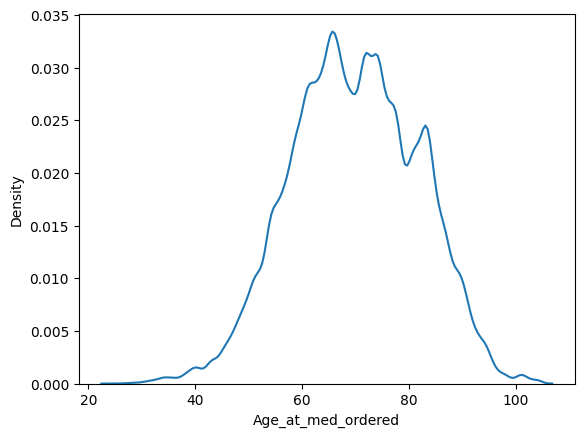

In [95]:
sns.kdeplot(x = 'Age_at_med_ordered', data = df4)

In [96]:
df4.shape

(452479, 14)

In [97]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452479 entries, 0 to 452478
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Internalpatientid         452479 non-null  int64  
 1   Age_at_med_ordered        452479 non-null  float64
 2   Ordered_medication_atc_5  452479 non-null  object 
 3   Order_status              452479 non-null  object 
 4   Stop_reason               452479 non-null  object 
 5   State                     452479 non-null  object 
 6   Order_date                452479 non-null  object 
 7   Order_time                452479 non-null  object 
 8   Medication_start_date     433404 non-null  object 
 9   Medication_start_time     433404 non-null  object 
 10  Medication_stop_date      444066 non-null  object 
 11  Medication_stop_time      444066 non-null  object 
 12  Order_discontinue_date    316477 non-null  object 
 13  Order_discontinue_time    316477 non-null  o

In [98]:
df4.Ordered_medication_atc_5.nunique()

1566

In [99]:
df4.Ordered_medication_atc_5.value_counts()

Not specified                                                        32633
furosemide                                                           12430
metoprolol                                                           11201
lisinopril                                                            9720
Not a medication                                                      9139
                                                                     ...  
degarelix                                                                1
aluminium hydroxide ; lidocaine ; magnesium hydroxide ; silicones        1
ethanol ; morphine                                                       1
glecaprevir, pibrentasvir                                                1
silver                                                                   1
Name: Ordered_medication_atc_5, Length: 1566, dtype: int64

In [100]:
df4.Order_status.unique()

array(['discontinued', 'cancelled', 'expired', 'discontinued/edit',
       'active', 'complete', 'hold', 'lapsed', 'delayed', 'pending',
       'unreleased', 'renewed'], dtype=object)

In [101]:
df4.Order_status.value_counts()

discontinued         259953
expired              115868
discontinued/edit     48102
cancelled             15742
complete               7406
active                 4250
lapsed                 1031
unreleased               52
hold                     38
pending                  24
delayed                  11
renewed                   2
Name: Order_status, dtype: int64

<Axes: xlabel='Order_status', ylabel='count'>

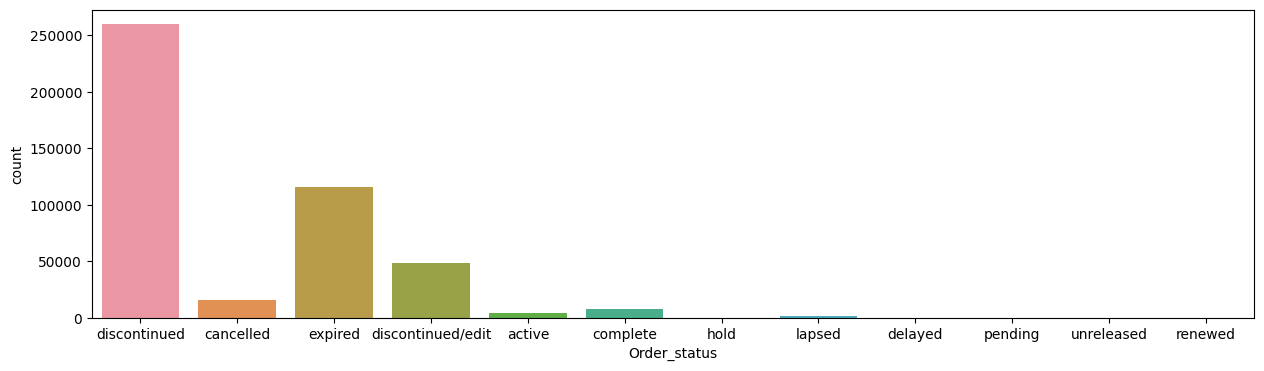

In [102]:
plt.figure(figsize=(15,4))
sns.countplot(data=df4, x="Order_status")


In [103]:
df4.Stop_reason.unique()

array(['Not specified (no value)', 'Requesting Physician Cancelled',
       'Duplicate Order', 'No Longer Indicated',
       'Treating Specialty Change', 'Physician Cancelled', 'Surgery',
       'Entered in error', 'Cancelled By Provider',
       'Discontinued by Ordering Provider',
       'Discontinued by Current Provider', 'No Longer Needed',
       'Entered In Error', 'Obsolete Order', 'PATIENT REFUSED',
       'VIONE-Patient reported no longer taking', 'Order completed',
       'Adverse Drug Reaction', 'Transfer', 'Duplicate order',
       'MD/Provider Cancelled', 'Order Cancelled',
       "Obsolete orders d/c'd per policy", 'Order Not Required',
       'Cancelled by Requesting Clinician', 'Therapeutic Failure',
       'VIONE-Not indicated/Tx complete', 'Order is complete',
       'Deprescribed - See Progress Note',
       'VIONE-D/C Alternate Med Prescribed', '3.Duplicate Order',
       '1.Requesting Physician Cancelled', 'Patient cancelled',
       'Course of Medication Completed

In [104]:
df4.Stop_reason.nunique()

246

## **MEDICATIONS ADMINISTERED**

In [105]:
df5.head()

,Internalpatientid,Age at med administration,Administration date,Administration end date,Administered medication atc 5,Administration status,Dose form,Dose administered,Dose unit administered,State
0,100012,53.970919,2003-06-21 08:54:13.0,NaN,venlafaxine,Given,tab,1.0,tab,New Mexico
1,100012,55.317773,2004-10-25 15:30:14.0,NaN,gemfibrozil,Given,"tab,oral",1.0,"tab,oral",New Mexico
2,100012,57.656417,2007-02-27 10:05:30.0,NaN,morphine,Held,inj,0.0,NaN,New Mexico
3,100012,58.151333,2007-08-27 07:29:42.0,NaN,omeprazole,Given,"cap,sa",1.0,"cap,sa",New Mexico
4,100012,58.151362,2007-08-27 07:44:54.0,NaN,insulins and analogues,Held,inj,0.0,NaN,New Mexico


In [106]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328800 entries, 0 to 1328799
Data columns (total 10 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Internalpatientid              1328800 non-null  int64  
 1   Age at med administration      1328800 non-null  float64
 2   Administration date            1328800 non-null  object 
 3   Administration end date        15505 non-null    object 
 4   Administered medication atc 5  1328800 non-null  object 
 5   Administration status          1328800 non-null  object 
 6   Dose form                      1328800 non-null  object 
 7   Dose administered              1291375 non-null  float64
 8   Dose unit administered         1252773 non-null  object 
 9   State                          1328800 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 101.4+ MB


In [107]:
df5[['Administration_date', 'Administration_time']] = df5['Administration date'].str.split(' ', expand=True)

In [108]:
df5.drop('Administration date', axis = 1, inplace = True)

In [109]:
df5.rename(columns = {'Age at med administration':'Age_at_med_administration','Administration end date':'Administration_end_date',
                      'Administered medication atc 5':'Administered_medication_atc_5','Administration status':'Administration_status',
                      'Dose form':'Dose_form','Dose administered':'Dose_administered','Dose unit administered':'Dose_unit_administered'}, inplace = True)
df5.head()

,Internalpatientid,Age_at_med_administration,Administration_end_date,Administered_medication_atc_5,Administration_status,Dose_form,Dose_administered,Dose_unit_administered,State,Administration_date,Administration_time
0,100012,53.970919,NaN,venlafaxine,Given,tab,1.0,tab,New Mexico,2003-06-21,08:54:13.0
1,100012,55.317773,NaN,gemfibrozil,Given,"tab,oral",1.0,"tab,oral",New Mexico,2004-10-25,15:30:14.0
2,100012,57.656417,NaN,morphine,Held,inj,0.0,NaN,New Mexico,2007-02-27,10:05:30.0
3,100012,58.151333,NaN,omeprazole,Given,"cap,sa",1.0,"cap,sa",New Mexico,2007-08-27,07:29:42.0
4,100012,58.151362,NaN,insulins and analogues,Held,inj,0.0,NaN,New Mexico,2007-08-27,07:44:54.0


In [110]:
df5.isnull().sum()

Internalpatientid                      0
Age_at_med_administration              0
Administration_end_date          1313295
Administered_medication_atc_5          0
Administration_status                  0
Dose_form                              0
Dose_administered                  37425
Dose_unit_administered             76027
State                                  0
Administration_date                    0
Administration_time                    0
dtype: int64

In [111]:
df5.shape

(1328800, 11)

<Axes: xlabel='Age_at_med_administration', ylabel='Density'>

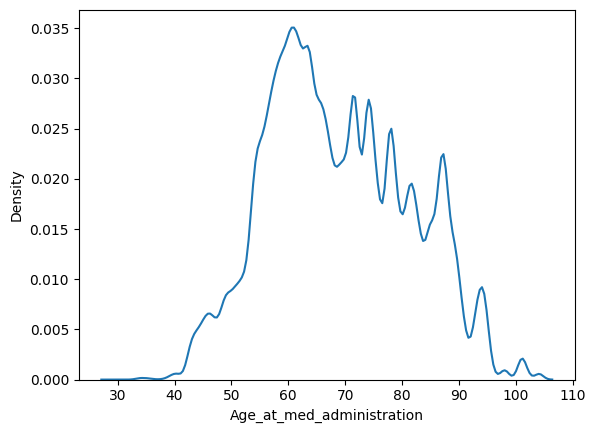

In [112]:
sns.kdeplot(x = 'Age_at_med_administration', data = df5)

In [113]:
df5.Age_at_med_administration.mean()

68.94713608192716

In [114]:
#df5.Administered_medication_atc_5.unique()
df5.Administered_medication_atc_5.nunique()

977

In [115]:
df5.Administered_medication_atc_5.value_counts()

Not specified                                                                                                                                                                                                                                                   68439
paracetamol (acetaminophen)                                                                                                                                                                                                                                     45800
metoprolol                                                                                                                                                                                                                                                      42230
baclofen                                                                                                                                                                                                              

In [116]:
df5.Administration_status.unique()

array(['Given', 'Held', 'Infusing (infusion orders)', 'Refused',
       'Completed (infusion orders)', 'Not given', 'Missing dose',
       'Removed (patch taken off)', 'Not specified (no value)',
       'Stopped (infusion orders)'], dtype=object)

In [117]:
df5.Administration_status.value_counts()

Given                          1209025
Held                             63353
Refused                          33058
Completed (infusion orders)      12413
Infusing (infusion orders)        3517
Missing dose                      3406
Removed (patch taken off)         3025
Not given                          639
Not specified (no value)           297
Stopped (infusion orders)           67
Name: Administration_status, dtype: int64

<Axes: xlabel='Administration_status', ylabel='count'>

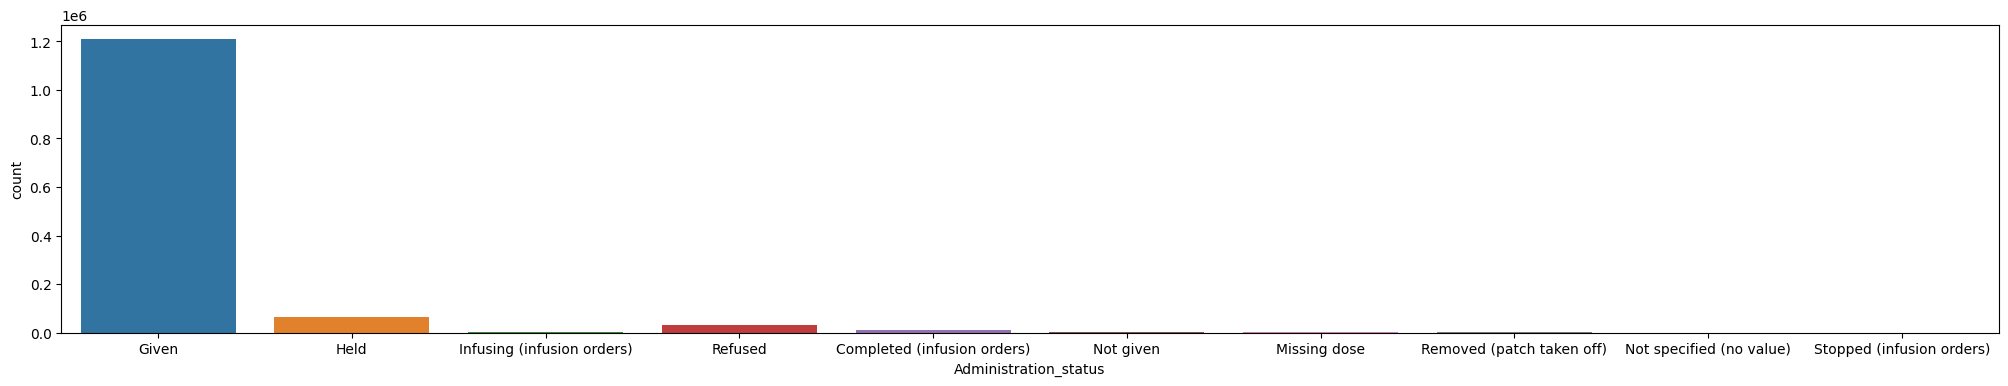

In [118]:
plt.figure(figsize=(25,4))
sns.countplot(x = 'Administration_status', data = df5)

In [119]:
df5.Dose_form.unique()

array(['tab', 'tab,oral', 'inj', 'cap,sa', 'susp,oph', 'soln,spray,nasal',
       'cap,oral', 'tab,ec', 'inj,soln', 'inhalant', 'tab,sa',
       'test strip', 'cap,ec', 'inhl,nasal', 'soln,inhl/oral',
       'cream,top', 'susp', 'inhl,oral', 'wipe', 'liquid,oral',
       'tab,oral disintegrating,sa', 'soln,top', 'soln,inhl',
       'pwdr,renst-oral', 'unit/test', 'supp,rtl', 'soln,oral',
       'powder,oral', 'oint,top', 'rinse,oral', 'tab,chewable',
       'inj,pwdr', 'syrup', 'tab,sublingual', 'mouthwash', 'jelly,top',
       'syrup,oral', 'gel,top', 'patch', 'inj,conc', 'soln,oph',
       'susp,oral', 'powder,top', 'soln,dialysis', 'jelly', 'liquid',
       'enema', 'miscellaneous', 'cap/tab', 'inj,conc-soln', 'gel,oph',
       'emulsion,oph', 'oint,oph', 'tab,sa (extended release)',
       'cap,inhl', 'shampoo', 'soln,nasal', 'lotion', 'inj,lyphl',
       'elixir', 'lozenge', 'spray,oral', 'gauze', 'soln,otic',
       'susp,otic', 'liquid,top', 'spray,top', '*missing*',
       'tab

In [120]:
df5.Dose_form.value_counts()

tab                542703
inj                128119
cap,oral            78145
soln,inhl           69711
inj,soln            51894
                    ...  
fluid extract           1
gel,transdermal         1
ointment                1
unit/test               1
soap/detergent          1
Name: Dose_form, Length: 132, dtype: int64

In [121]:
df5.Dose_administered.nunique()

24429

In [122]:
df5.Dose_administered.value_counts()

1.000000    986519
2.000000    130786
0.000000     63871
3.000000     29062
4.000000      3516
             ...  
3.471234         1
3.419373         1
3.304501         1
3.263469         1
4.592077         1
Name: Dose_administered, Length: 24429, dtype: int64

In [123]:
df5.Dose_unit_administered.value_counts()

tab                542721
cap,oral            78127
ML                  37136
tab,sa              34634
tab,oral            29366
                    ...  
305485900006            1
2 units for 247         1
60mg=1ml                1
bs 170 1 unit           1
2 units bs 213          1
Name: Dose_unit_administered, Length: 15467, dtype: int64

In [124]:
df5.Dose_unit_administered.nunique()

15467

## **DEATH**

In [125]:
df6.head()

,Unnamed: 0,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10.0
1,1,100037,75.241135,2008-10-16 15:14:26.0
2,2,100045,85.399403,2019-01-26 11:33:52.0
3,3,100095,84.136551,2004-08-10 21:49:35.0
4,6,10013,68.372126,2007-06-11 00:17:06.0


In [126]:

# split the DateTime column into separate Date and Time columns
df6[['Death_Date', 'Death_Time']] = df6['Death date'].str.split(' ', expand=True)

In [127]:
df6.drop('Unnamed: 0', axis = 1, inplace = True)

In [128]:
df6.head()

,Internalpatientid,Age at death,Death date,Death_Date,Death_Time
0,100036,72.412770,2015-01-18 20:49:10.0,2015-01-18,20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0,2008-10-16,15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0,2019-01-26,11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0,2004-08-10,21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0,2007-06-11,00:17:06.0


In [129]:
df6['Age at death'].mean()

78.3606613225899

In [130]:
df6.rename(columns={'Age at death':'Age_at_death'},inplace = True)

<Axes: xlabel='Age_at_death', ylabel='Density'>

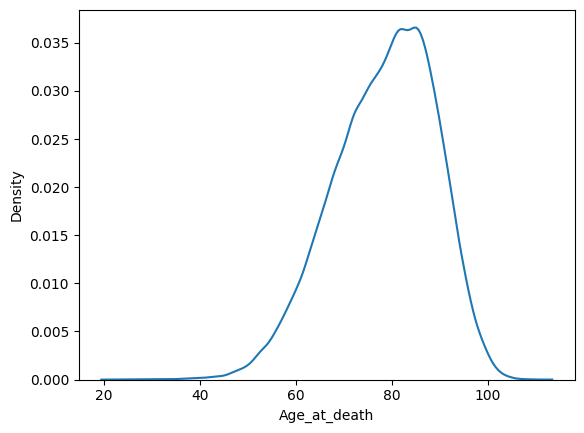

In [131]:
sns.kdeplot(x = 'Age_at_death', data = df6)